### 랜덤 추출
- 좌표 갯수는 30만개가 최대(일일)
- 데이터 갯수보다는 역과의 거리 계산하는 것이 더 좋은 것이라 생각
- 분포별 30만개 샘플링
    1. qcut (데이터 개수 기준 균등 분할)

        - low: 보증금 값이 낮은 33%
        - mid: 중간 값인 33%
        - high: 보증금 값이 높은 33%
        -> 경계 값이 데이터 분포에 따라 달라짐
    - 분포 유지 30만개 샘플링
    - 분포 별 10만개씩 샘플링

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.4 MB/s eta 0:00:00


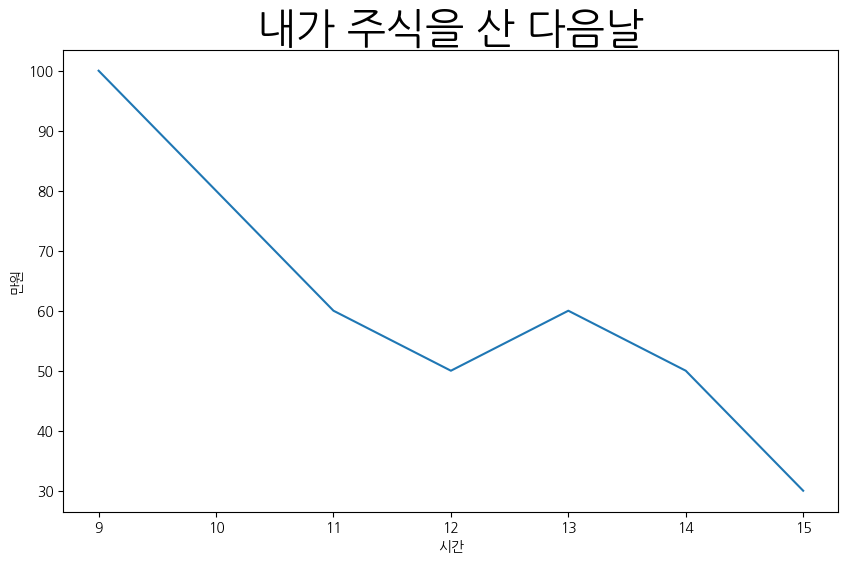

In [4]:
import koreanize_matplotlib
a = [1,2,3,4,5,6,7,8,9,10]
b = np.random.rand(10)
plt.figure(figsize=(10, 6))
plt.plot([9, 10, 11, 12, 13, 14, 15], [100, 80, 60, 50, 60, 50, 30])
plt.title('내가 주식을 산 다음날', size=30)
plt.xlabel('시간')
plt.ylabel('만원')
plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# ## 데이터 포맷 저장
# lease_df.to_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/4_final_lease.csv", index=False, date_format="%Y-%m-%d")

# 로드시 참고
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/6_non_outlier.csv",
                 parse_dates=["계약날짜"],  # 날짜 컬럼 복구
                 dtype={                  # category 컬럼 복구
                     "주택유형": "category",
                     "계약구분보완(범주)": "category",
                     "계약분기": "category"
                 })

In [7]:
df.shape

(903525, 27)

In [8]:
df

,단지명,주택유형,전체주소,계약날짜,계약구분보완(범주),계약분기,건축년도,계약연도,계약개월수,층,...,보증금면적비,단지별평균보증금만원,Index,Rate,PpRate,단지갯수,구갯수,구_단지별_이상치(2진),구_단지별_이상치만원(2진),단지클러스터
0,대성유니드,아파트,서울특별시 성동구 마장로37길 7,2019-04-30,신규,2,2004,2019,24,18,...,636.515913,53752.296588,2203.59,1.75,5.285769,494,40051,0,0,4
1,행당한진타운,아파트,서울특별시 성동구 행당로 82,2019-04-30,신규,2,2000,2019,24,12,...,607.956558,54107.646751,2203.59,1.75,5.285769,1960,40051,0,0,4
2,대림e-편한세상,아파트,서울특별시 성동구 행당로 79,2019-04-30,신규,2,2000,2019,24,2,...,553.788147,49621.343129,2203.59,1.75,5.285769,3281,40051,0,0,4
3,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,2017,2019,24,8,...,827.286265,93082.987887,2203.59,1.75,5.285769,1240,8537,0,0,2
4,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,2017,2019,24,6,...,825.121411,93082.987887,2203.59,1.75,5.285769,1240,8537,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903520,현대썬앤빌601,오피스텔,서울특별시 동대문구 장한로 91,2024-05-01,신규,2,2015,2024,24,16,...,499.286733,11725.609756,2636.52,3.50,5.091858,726,33540,0,0,3
903521,가우디오피스텔,오피스텔,서울특별시 동대문구 장한로 80,2024-05-01,신규,2,2020,2024,24,5,...,880.851064,21359.615385,2636.52,3.50,5.091858,92,33540,0,0,3
903522,마곡 파크뷰 대방디엠시티 오피스텔,오피스텔,서울특별시 강서구 마곡동로10길 23,2024-05-01,갱신,2,2019,2024,12,10,...,798.350825,19539.735584,2636.52,3.50,5.091858,2171,85770,0,0,3
903523,방학신화 하니엘시티,오피스텔,서울특별시 도봉구 노해로63가길 229,2024-05-01,신규,2,2021,2024,24,2,...,850.031908,13681.830065,2636.52,3.50,5.091858,299,26469,0,0,3


In [9]:
df['보증금면적비'].describe()

,보증금면적비
count,903525.000000
mean,697.664523
std,297.154907
min,38.580247
25%,493.641232
50%,649.231283
75%,840.053763
max,4385.882471


In [10]:
df['보증금만원'].max()

750000.0

In [11]:
df['보증금만원'].quantile(0.95)

103000.0

In [12]:
df.loc[df['보증금만원'] >= 200000,'보증금만원'].count()/ 903525

0.003519548435295094

In [13]:
df_low = df[df['보증금만원'] < 200000]

In [14]:
df_low.shape

(900345, 27)

###보증금 면적비 시각화

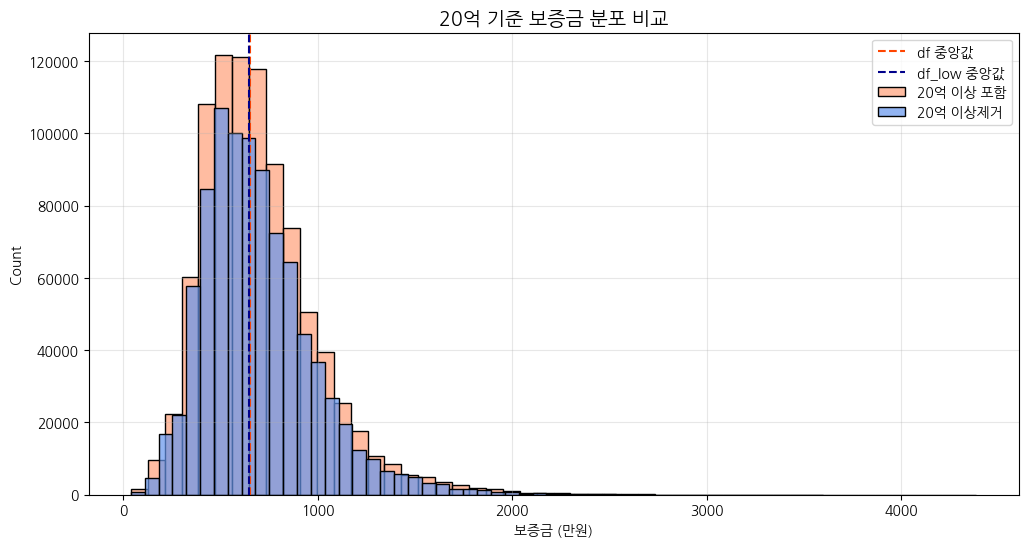

In [15]:
# 🔹 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(df["보증금면적비"], bins=50, color="#FFA07A", alpha=0.7, label="20억 이상 포함")
sns.histplot(df_low["보증금면적비"], bins=50, color="#6495ED", alpha=0.7, label="20억 이상제거")
plt.axvline(df["보증금면적비"].median(), color="#FF4500", linestyle="dashed", label="df 중앙값")
plt.axvline(df_low["보증금면적비"].median(), color="#00008B", linestyle="dashed", label="df_low 중앙값")
plt.legend()
plt.xlabel("보증금 (만원)")
plt.ylabel("Count")
plt.title("20억 기준 보증금 분포 비교", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

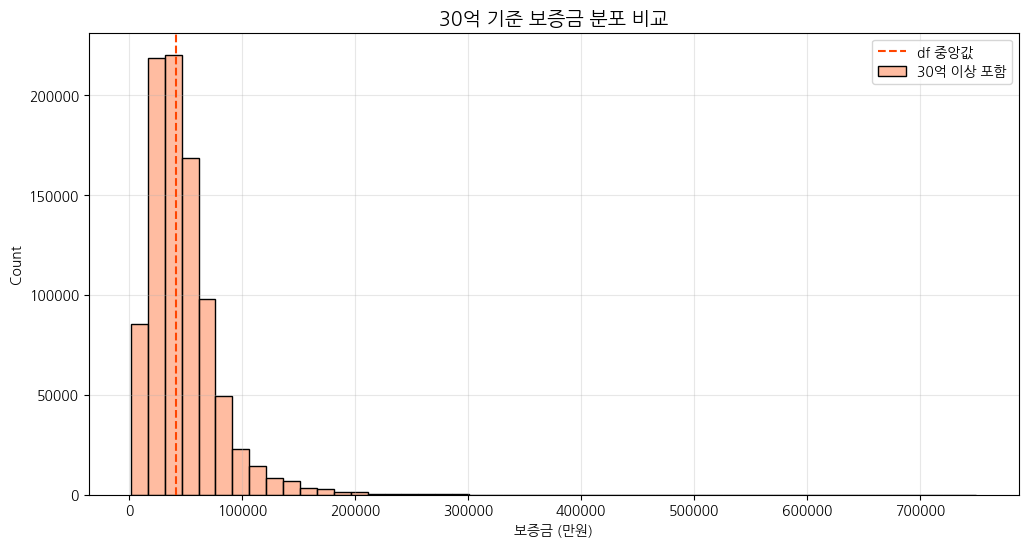

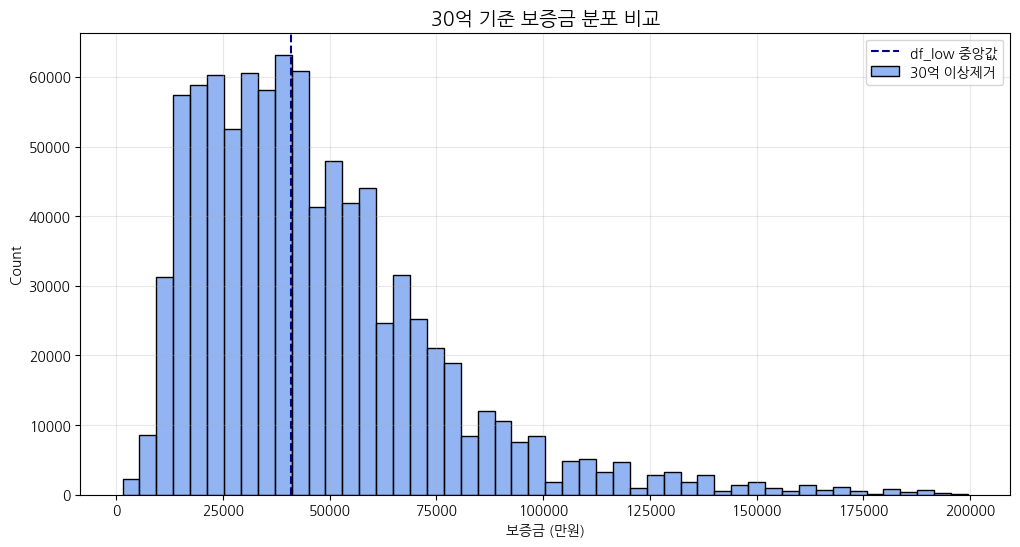

In [16]:
# 🔹 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(df["보증금만원"], bins=50, color="#FFA07A", alpha=0.7, label="30억 이상 포함")
plt.axvline(df["보증금만원"].median(), color="#FF4500", linestyle="dashed", label="df 중앙값")
plt.legend()
plt.xlabel("보증금 (만원)")
plt.ylabel("Count")
plt.title("30억 기준 보증금 분포 비교", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# 🔹 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(df_low["보증금만원"], bins=50, color="#6495ED", alpha=0.7, label="30억 이상제거")
plt.axvline(df_low["보증금만원"].median(), color="#00008B", linestyle="dashed", label="df_low 중앙값")
plt.legend()
plt.xlabel("보증금 (만원)")
plt.ylabel("Count")
plt.title("30억 기준 보증금 분포 비교", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


In [18]:
df_low.loc[(df_low['구_단지별_이상치(2진)']==1), ['전용면적m','단지명','단지갯수','보증금만원','단지별평균보증금만원']]

,전용면적m,단지명,단지갯수,보증금만원,단지별평균보증금만원
19,84.76,구의강변우성아파트,292,35000.0,53615.040609
76,58.50,풍림2,246,18000.0,30981.722222
152,34.29,대우미래사랑,713,21000.0,24252.502146
381,43.20,현대리버빌1지구,499,21300.0,42500.795796
399,160.28,"현대2차(10,11,20,23,24,25동)",327,70000.0,132955.531915
...,...,...,...,...,...
902042,17.46,용산큐브,507,16000.0,17976.492806
902241,18.33,"상암DMC푸르지오시티, S-City",1764,13500.0,19352.560150
902516,27.99,현대 센트럴 가양,148,22000.0,26090.164835
903029,23.79,블레스하임 3차,127,26000.0,31274.271845


In [19]:

# 🔹 보증금 구간을 3개로 나누기
df_low["보증금구간"] = pd.qcut(df_low["보증금만원"], q=3, labels=["low", "mid", "high"])

# 🔹 df_1: 원본 비율 유지 (30% 샘플링)
df_1 = df_low.groupby("보증금구간").apply(lambda x: x.sample(frac=0.3, random_state=42)).reset_index(drop=True)

<ipython-input-19-2bddc6ed8e79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low["보증금구간"] = pd.qcut(df_low["보증금만원"], q=3, labels=["low", "mid", "high"])
<ipython-input-19-2bddc6ed8e79>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_1 = df_low.groupby("보증금구간").apply(lambda x: x.sample(frac=0.3, random_state=42)).reset_index(drop=True)
<ipython-input-19-2bddc6ed8e79>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded fro

In [21]:
df_low.shape

(900345, 28)

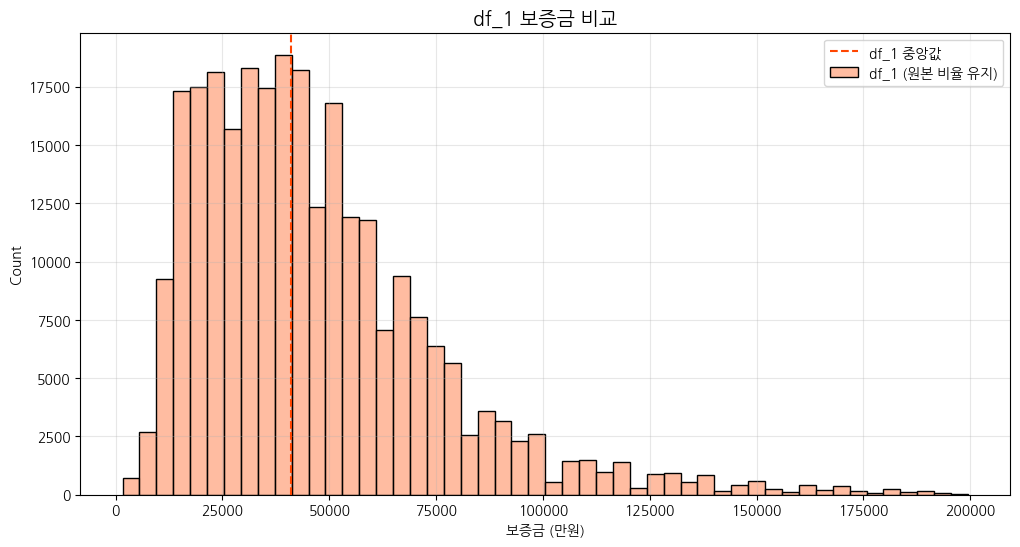

In [20]:
# 🔹 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(df_1["보증금만원"], bins=50, color="#FFA07A", alpha=0.7, label="df_1 (원본 비율 유지)")
plt.axvline(df_1["보증금만원"].median(), color="#FF4500", linestyle="dashed", label="df_1 중앙값")
plt.legend()
plt.xlabel("보증금 (만원)")
plt.ylabel("Count")
plt.title("df_1 보증금 비교", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


In [22]:
df_low['보증금구간'].value_counts()

,count
보증금구간,
low,303234
mid,299209
high,297902


In [24]:
df_1.shape

(270104, 28)

In [25]:
df_1.to_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/RANDOMSAMPLING/rnadom_30k_dist.csv", index=False, date_format="%Y-%m-%d")
df_low.to_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/RANDOMSAMPLING/90k_uder_2B.csv", index=False, date_format="%Y-%m-%d")
